<a href="https://colab.research.google.com/github/aakarshit28/Time-Series-Project/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving nifty 50 dataset.csv to nifty 50 dataset (1).csv
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               501 non-null    object 
 1   Symbol                     501 non-null    object 
 2   Industry                   501 non-null    object 
 3   Series                     501 non-null    object 
 4   Open                       501 non-null    float64
 5   High                       501 non-null    float64
 6   Low                        501 non-null    float64
 7   Previous Close             501 non-null    float64
 8   Last Traded Price          501 non-null    float64
 9   Change                     501 non-null    object 
 10  Percentage Change          501 non-null    object 
 11  Share Volume               501 non-null    int64  
 12  Value (Indian Rupee)       501 non-n

/tmp/ipython-input-2-3171833068.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)  # Fill NaN with median
/tmp/ipython-input-2-3171833068.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Summary Statistics of Cleaned Dataset:
              Open         High          Low  Previous Close  \
count   341.000000   341.000000   341.000000      341.000000   
mean    535.887537   545.515249   527.616862      536.875806   
std     421.183047   428.723523   415.176611      421.879461   
min      11.000000    11.200000    10.750000       10.950000   
25%     208.700000   209.700000   204.500000      209.000000   
50%     427.850000   435.650000   424.000000      428.900000   
75%     770.000000   791.500000   763.750000      768.250000   
max    1676.600000  1703.050000  1645.150000     1683.050000   

       Last Traded Price      Change  Percentage Change  Share Volume  \
count         341.000000  341.000000         341.000000  3.410000e+02   
mean          539.165689    2.314076           0.441012  7.151277e+05   
std           423.853901   12.837151           1.811568  9.011578e+05   
min            11.050000  -74.400000          -4.740000  6.325000e+03   
25%           207.

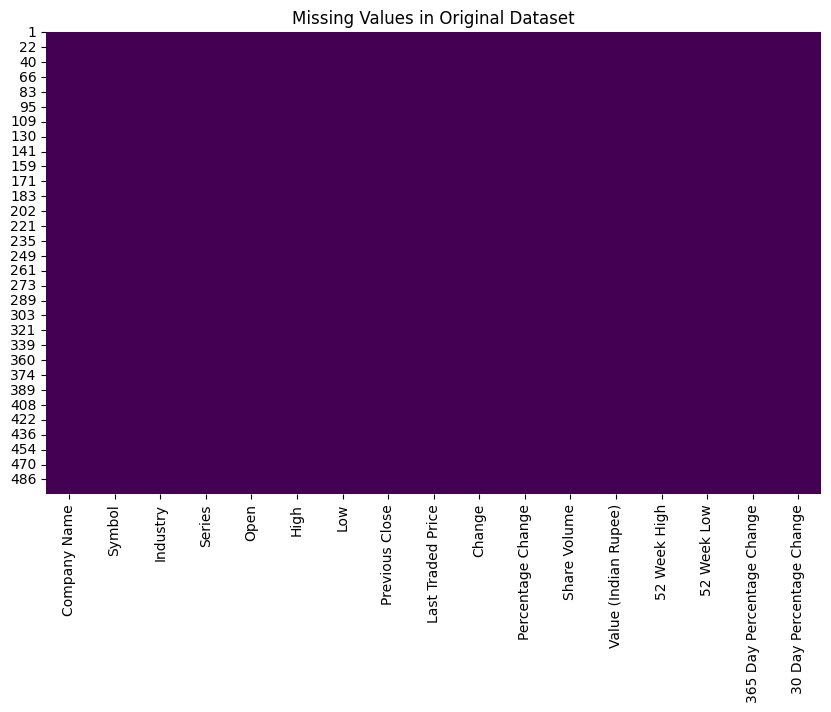

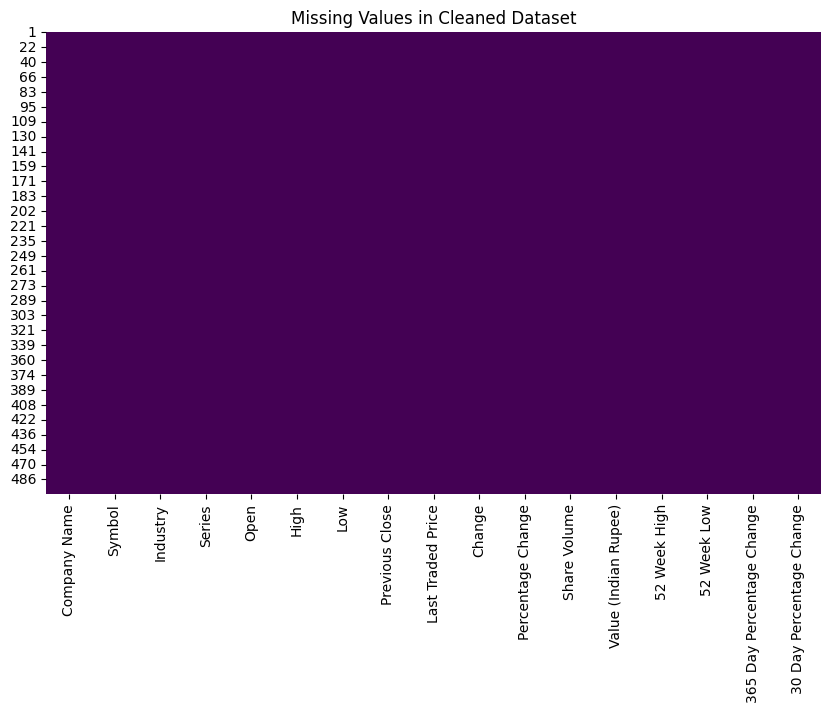

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
# Assuming the dataset is uploaded to Google Colab
from google.colab import files
uploaded = files.upload()  # Upload the CSV file
df = pd.read_csv('nifty 50 dataset.csv')

# Step 1: Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Step 2: Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Step 3: Handle missing values
# Replace '-' with NaN for consistency
df.replace('-', np.nan, inplace=True)

# For numerical columns, fill missing values with the median
numerical_columns = ['Open', 'High', 'Low', 'Previous Close', 'Last Traded Price',
                     'Change', 'Percentage Change', 'Share Volume', 'Value (Indian Rupee)',
                     '52 Week High', '52 Week Low', '365 Day Percentage Change',
                     '30 Day Percentage Change']
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, invalid parsing to NaN
    df[col].fillna(df[col].median(), inplace=True)  # Fill NaN with median

# For categorical columns, fill missing values with 'Unknown'
categorical_columns = ['Company Name', 'Symbol', 'Industry', 'Series']
for col in categorical_columns:
    df[col].fillna('Unknown', inplace=True)

# Step 4: Check for duplicates and remove them
print("\nNumber of duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# Step 5: Standardize data types
# Ensure numerical columns are float
for col in numerical_columns:
    df[col] = df[col].astype(float)

# Ensure categorical columns are strings
for col in categorical_columns:
    df[col] = df[col].astype(str)

# Step 6: Handle outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply outlier removal to key numerical columns
for col in ['Open', 'High', 'Low', 'Last Traded Price', 'Share Volume']:
    df = remove_outliers(df, col)

# Step 7: Standardize text data
# Remove leading/trailing spaces and convert to title case for consistency
for col in categorical_columns:
    df[col] = df[col].str.strip().str.title()

# Step 8: Verify data cleaning
print("\nDataset Info After Cleaning:")
print(df.info())
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

# Step 9: Save the cleaned dataset
df.to_csv('cleaned_nifty_50_dataset.csv', index=False)
files.download('cleaned_nifty_50_dataset.csv')

# Step 10: Basic summary statistics
print("\nSummary Statistics of Cleaned Dataset:")
print(df.describe())

# Optional: Visualize missing values before and after (for reference)
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values before cleaning (on original dataset)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Original Dataset')
plt.show()

# Visualize missing values after cleaning
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Cleaned Dataset')
plt.show()